In [61]:
import pandas as pd
%matplotlib inline

Bringing in the generator function from utils.py:

In [64]:
def str_date_gen(y1=False, y2=False, m1=1, m2=12, d1=1, d2=31):
    """Returns a generator of valid date strings in the format "yyyy-mm-dd".

    Useful when used in conjunction with `.isin()` method to filter Dataframes 
    on the `date` column, which is a string dtype. Returns all valid dates in current 
    year by default.
    \n.
    """

    y1 = datetime.datetime.now().year if y1 is False else y1
    y2 = datetime.datetime.now().year if y2 is False else y2

    def get_date(y, m, d):
        try:
            return str(datetime.date(y, m, d))
        except ValueError:
            return 'skip'
    return (
        get_date(y,m,d) for y in range(
            y1, y2 + 1) for m in range(
            m1, m2 + 1) for d in range(
            d1, d2 + 1) if get_date(y, m, d) != 'skip')

Load historical data of ML predictions vs competing forecasters' predictions vs actual recorded values

In [62]:
dbp = pd.read_csv('/Users/Alex/Coding/weather_db/Data/prediction_db_analysis.csv')

Compute rows of prediction errors for ML model (ML), The Weather Network (TWN), and Environment Canada (EC). We aren't taking the absoulte values of the errors here because we're interested in seeing if there's a bias (i.e. a systematic offset in prediction error) for any of the forecasters.

In [63]:
dbp['ML_err'] = dbp.predictions - dbp.high
dbp['TWN_err'] = dbp.TWN_high_T1 - dbp.high
dbp['EC_err'] = dbp.EC_high_T1 - dbp.high
dbp['norm_err'] = dbp.rolling_normal_high - dbp.high

In [65]:
dbp[dbp.date.isin(get_dates(y1=2018))][['ML_err', 'TWN_err', 'EC_err', 'norm_err']].describe()

,ML_err,TWN_err,EC_err,norm_err
count,16160.000000,16160.000000,16160.000000,16160.000000
mean,-0.086495,-1.414078,-1.264264,-0.949189
std,2.542644,2.513040,3.118436,6.135192
min,-31.597757,-31.000000,-33.000000,-37.000000
25%,-1.497840,-2.700000,-2.800000,-5.100000
50%,-0.042542,-1.200000,-1.100000,-1.200000
75%,1.383511,0.000000,0.300000,3.100000
max,16.483165,19.900000,24.600000,22.600000


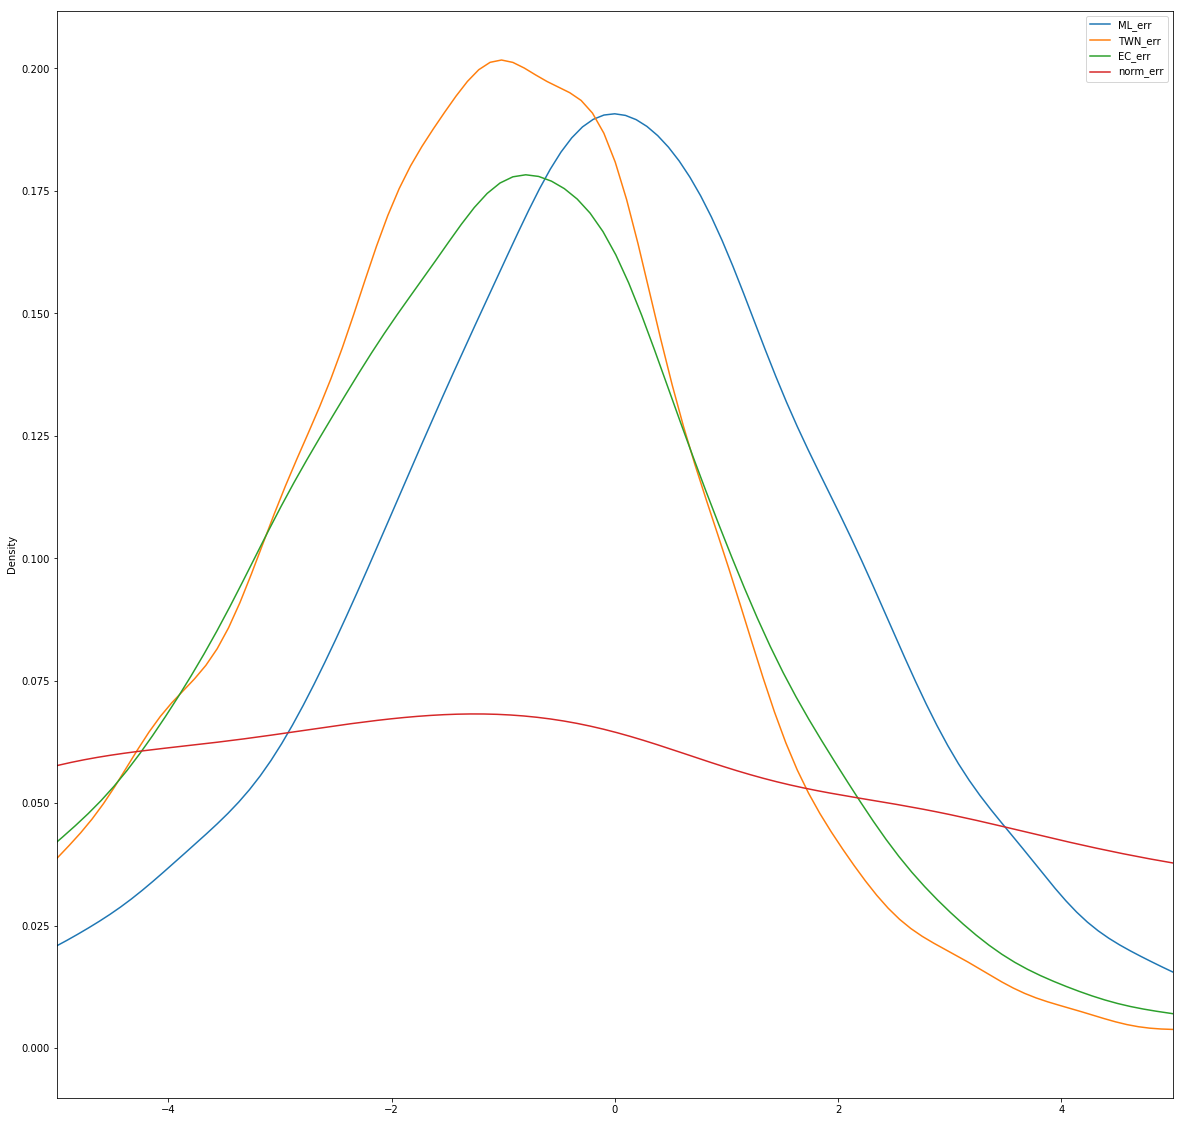

In [66]:
dbp[dbp.date.isin(get_dates(y1=2018))].plot(y=['ML_err', 'TWN_err', 'EC_err', 'norm_err'], kind='kde', figsize=(20,20), xlim=(-5,5))

The summary statistics and kernel density estimation plot shown above demonstrate that our 2 competing forecasters have a bias in their prediction errors, whereas our ML model does not (relatively speaking). See README `Update` section for more details under `Feb 2, 2019`.